In [1]:
import numpy as np
import pandas as pd
import csv
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import networkx as nx
import seaborn as sns
sns.set()

In [2]:
# From CSV-File to Graph and Adjecency Matrix

def CSVToGraphAndAdjecency(csv) :
    
    # Uploading the file
    file=open(csv)
    df = pd.read_csv(file)
    df.head()
    
    # Converting to categorized type of DataFrame
    df = convert(df, 2,12)
    df_cluster = df.iloc[:,0:11]
    
    # Converting to Graph
    W = pairwise_distances(df_cluster, metric="euclidean")
    Graph=nx.from_numpy_matrix(W)
    draw_graph(Graph)
    
    # Creating an adjecency matrix
    adj_matrix = nx.adjacency_matrix(Graph)
    print(adj_matrix.todense())
    
    return Graph, adj_matrix, df_cluster

In [3]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

C:\Users\eveli\AppData\Local\Temp\ipykernel_3392\2724089233.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(Graph)


[[0.000 53.920 59.054 ... 74.581 73.725 72.023]
 [53.920 0.000 7.071 ... 26.019 25.020 23.022]
 [59.054 7.071 0.000 ... 19.105 18.111 16.125]
 ...
 [74.581 26.019 19.105 ... 0.000 1.000 3.000]
 [73.725 25.020 18.111 ... 1.000 0.000 2.000]
 [72.023 23.022 16.125 ... 3.000 2.000 0.000]]


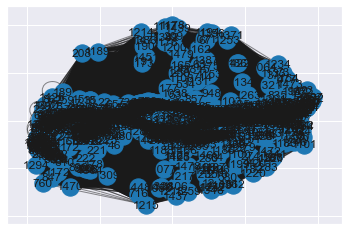

In [5]:
csv="Flu_Classification.csv"
Graph, adj_matrix, df_cluster = CSVToGraphAndAdjecency(csv)

In [6]:
# Creating Degree Matrix, Laplacian Matrix, printing the eigenvalues and eigenvectors

def bigFucntion(G, adj_matrix) :
    
    degrees = [val for (node, val) in Graph.degree()]
    
    # Degree matrix
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    
    # laplacian matrix
    L = D - adj_matrix
    print('laplacian matrix:')
    print(L)
    
    # Eigenvalues and Eigenvectors
    e, v = np.linalg.eig(L)
    e = e.real
    v = v.real
    
    print('eigenvalues:')
    print(e)
    
    print('eigenvectors:')
    print(v)
    
    return D, L, e, v

In [7]:
DegreeMatrix, LaplacianMatrix, e, v = bigFucntion(Graph, adj_matrix)

degree matrix:
[[1486.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1483.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1483.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 1484.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 1484.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 1484.000]]
laplacian matrix:
[[1486.000 -53.920 -59.054 ... -74.581 -73.725 -72.023]
 [-53.920 1483.000 -7.071 ... -26.019 -25.020 -23.022]
 [-59.054 -7.071 1483.000 ... -19.105 -18.111 -16.125]
 ...
 [-74.581 -26.019 -19.105 ... 1484.000 -1.000 -3.000]
 [-73.725 -25.020 -18.111 ... -1.000 1484.000 -2.000]
 [-72.023 -23.022 -16.125 ... -3.000 -2.000 1484.000]]
eigenvalues:
[-52983.852 21581.496 16378.164 ... 1483.000 1483.000 1483.000]
eigenvectors:
[[-0.035 -0.042 0.013 ... -0.000 0.000 0.000]
 [-0.022 0.012 0.022 ... -0.007 -0.001 -0.004]
 [-0.022 0.020 0.015 ... 0.018 -0.017 -0.156]
 ...
 [-0.025 0.037 -0.002 ... -0.000 -0.000 0.000]
 [-0.024 0.037 -0.002 ... -0.000 0.000 0.000]
 [-0.024 0.036 -0.000 .

In [22]:
# KMeans
def kmeans(v, n, df) :
    U = np.array(v[:, i[0]])
    km = KMeans(init='k-means++', n_clusters=n)
    df['clusters'] = km.fit_predict(U)
    return df

In [23]:
df_clusters1 = kmeans(df_cluster, v, 2)

NameError: name 'i' is not defined